## Figure creation
This file was used to create figures in the final paper showing microscope images.

In [1]:
import argparse
import os
import sys
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.distributions import Poisson
from skimage.metrics import peak_signal_noise_ratio
from skimage import io
from PIL import Image

In [2]:
def plot_img(im,grayscale=True,vmin=None,vmax=None):
    '''Plots image in gray or color. It doesn't consider vmin and vmax though.'''
    if im.min() < 0:
        im = im*0.5 + 0.5
    if grayscale:
        if vmin:
            plt.imshow(im.detach().to('cpu')[0,0],cmap='gray',vmin=vmin,vmax=vmax)
        else:
            plt.imshow(im.detach().to('cpu')[0,0],cmap='gray')
    else:
        if vmin:
            plt.imshow(im[0,:,:,:].detach().to('cpu').permute(1,2,0),vmin=vmin,vmax=vmax)
        else:
            plt.imshow(im[0,:,:,:].detach().to('cpu').permute(1,2,0))

In [ ]:
'''
First row: Clean, Gaussian noise (x3) Poisson noise (x3)
Second row: Supervised denoising: x6
Third row: z = 50
'''

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


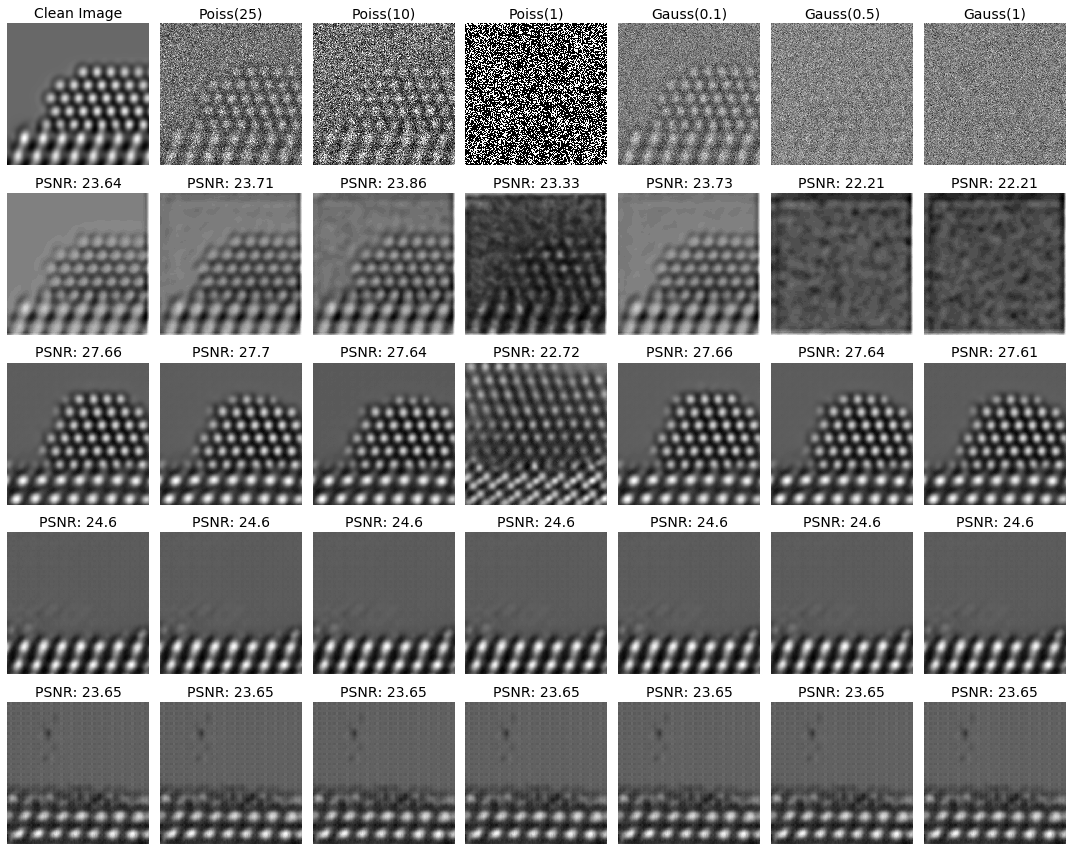

In [58]:
# First row
save_dir = '../../microscope_output/comparison_test/'
filename = "denoise_images.dat"
with open(save_dir+filename, "rb") as f:
    im_list = pickle.load(f)

    
# Second row
clean = im_list[0]
# im_list.append(clean)
for i in range(7):
    im_sup = torch.load(save_dir+'sup_denoised_'+str(i)+'_70.pt') - 0.27
    im_list.append(im_sup)

# im_list.append(clean)
for j in range(7):
    im_list.append(torch.load(save_dir+'im_'+str(j)+'/im_g50.pt'))
# im_list.append(clean)
for j in range(7):
    im_list.append(torch.load(save_dir+'im_'+str(1)+'/im_g100.pt'))
# im_list.append(clean)
for j in range(7):
    im_list.append(torch.load(save_dir+'im_'+str(1)+'/im_g150.pt'))



noise_dict = {
    1:"Poiss(25)",
    2:"Poiss(10)",
    3:"Poiss(1)",
    4:"Gauss(0.1)",
    5:"Gauss(0.5)",
    6:"Gauss(1)",
}
psnr_dict = {

    
7: 23.64,
8: 23.71,
9: 23.86,
10: 23.33,
11: 23.73,
12: 22.21,
13: 22.21,
14: 27.66,
15: 27.70,
16: 27.64,
17: 22.72,
18: 27.66,
19: 27.64,
20: 27.61,
21: 24.60,
22: 24.60,
23: 24.60,
24: 24.60,
25: 24.60,
26: 24.60,
27: 24.60,
28: 23.65,
29: 23.65,
30: 23.65,
31: 23.65,
32: 23.65,
33: 23.65,
34: 23.65,
    
}

# Print the image
plt.figure(figsize=[15,12])
for i,im in enumerate(im_list):
      plt.subplot(5,7,i+1)
      plt.axis('off')
      plot_img(im,True,0,1)
      if i==0:
        plt.title("Clean Image",fontsize=14)
    # Noise
      try:
        plt.title(noise_dict[i],fontsize=14)
      except KeyError:
        pass


      plt.subplot(5,7,i+1)
      plt.axis('off')
      plot_img(im,True,0,1)
    # PSNR
      try:
        plt.title('PSNR: {}'.format(psnr_dict[i]),fontsize=14)
      except KeyError:
        pass
plt.tight_layout()
plt.show()

In [51]:
# PSNR for Supervised denoiser

for idxs in [(0,7),(1,8),(2,9),(3,10),(4,11),(5,12),(6,13)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    mean_diff = den.mean() - true.mean()
    psnr = peak_signal_noise_ratio(true,den-mean_diff)
    print("{}: {:2.2f},".format(idxs[1],psnr))
    
for idxs in [(0,14),(1,15),(2,16),(3,17),(4,18),(5,19),(6,20)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    psnr = peak_signal_noise_ratio(true,den)
    print("{}: {:2.2f},".format(idxs[1],psnr))

7: 23.64,
8: 23.71,
9: 23.86,
10: 23.33,
11: 23.73,
12: 22.21,
13: 22.21,
14: 27.66,
15: 27.70,
16: 27.64,
17: 22.72,
18: 27.66,
19: 27.64,
20: 27.61,


In [53]:
# PSNR for Supervised denoiser

for idxs in [(1,8),(2,9),(3,10),(4,11),(5,12),(6,13)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    psnr = peak_signal_noise_ratio(true,den)
    print("{}: {:2.2f},".format(idxs[1],psnr))
    
for idxs in [(1,15),(2,16),(3,17),(4,18),(5,19),(6,20)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    psnr = peak_signal_noise_ratio(true,den)
    print("{}: {:2.2f},".format(idxs[1],psnr))

for idxs in [(0,14+7),(1,15+7),(2,16+7),(3,17+7),(4,18+7),(5,19+7),(6,20+7)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    psnr = peak_signal_noise_ratio(true,den)
    print("{}: {:2.2f},".format(idxs[1],psnr))

for idxs in [(0,14+7+7),(1,15+7+7),(2,16+7+7),(3,17+7+7),(4,18+7+7),(5,19+7+7),(6,20+7+7)]:
    true = im_list[0].detach().cpu().numpy()
    den = im_list[idxs[1]].detach().cpu().numpy()
    psnr = peak_signal_noise_ratio(true,den)
    print("{}: {:2.2f},".format(idxs[1],psnr))

8: 23.71,
9: 23.77,
10: 20.21,
11: 23.72,
12: 22.19,
13: 22.19,
15: 27.70,
16: 27.64,
17: 22.72,
18: 27.66,
19: 27.64,
20: 27.61,
21: 24.60,
22: 24.60,
23: 24.60,
24: 24.60,
25: 24.60,
26: 24.60,
27: 24.60,
28: 23.65,
29: 23.65,
30: 23.65,
31: 23.65,
32: 23.65,
33: 23.65,
34: 23.65,


In [ ]:
20*np.log10(2)-20*np.log10(1)

In [ ]:
save_dir = '../../microscope_output/real_image_test/'
sup_im = torch.load(save_dir+'sup_denoised_real_2.pt')

In [ ]:
im_list[0].max()

In [ ]:
plot_img(sup_im,True,0,1)

### Real test

In [59]:
save_dir = '../../microscope_output/real_image_test/'
sup_im_old = torch.load(save_dir+'test1/sup_denoised_real.pt')
sup_im = torch.load(save_dir+'sup_denoised_real_1_70.pt')
im_g50 = torch.load(save_dir+'im_g50.pt')
im_g100 = torch.load(save_dir+'im_g100.pt')
im_g150 = torch.load(save_dir+'im_g150.pt')
im = torch.load(save_dir+'im_noise.pt')

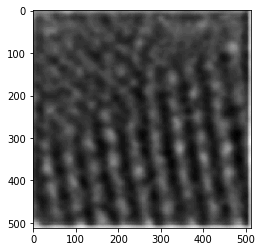

In [60]:
topil = transforms.ToPILImage()
resize = transforms.Resize(358)
totensor = transforms.ToTensor()
resize_big = transforms.Resize(512)
imm = totensor(resize_big(topil(sup_im[0,0]))).unsqueeze(0)
plot_img(imm,True,0,1)

(-0.5, 511.5, 511.5, -0.5)

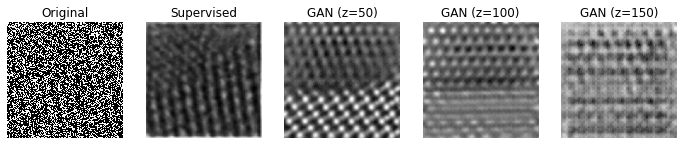

In [75]:
vmin=0
vmax=1
grayscale=True
# Reconstruction
plt.figure(figsize=[12,10])

plt.subplot(1,5,1)
plt.title("Original")

plot_img(im,grayscale,vmin,vmax)
plt.axis('off')
plt.subplot(1,5,2)
plt.title("Supervised")
plot_img(imm,grayscale,vmin,vmax)
plt.axis('off')
plt.subplot(1,5,3)
plt.title("GAN (z=50)")
# after optimizing
with torch.no_grad():
    plot_img(im_g50,grayscale,vmin,vmax)
plt.axis('off')

plt.subplot(1,5,4)
plt.title("GAN (z=100)")
# after optimizing
with torch.no_grad():
    plot_img(im_g100,grayscale,vmin,vmax)
plt.axis('off')
plt.subplot(1,5,5)
plt.title("GAN (z=150)")
# after optimizing
with torch.no_grad():
    plot_img(im_g150,grayscale,vmin,vmax)
plt.axis('off')
# plt.savefig(save_dir+"reconstruction.png")

In [ ]:
im_tensor = torch.cat(im_list,0)
plt.figure(figsize=[18,12])
plt.imshow(vutils.make_grid(im_tensor,nrow=7).detach().cpu().numpy()[0],cmap='gray',vmin=0,vmax=1)

In [ ]:
im_grid = vutils.make_grid(im_tensor,nrow=5).detach().cpu().numpy()[0]